### 1.复习上课内容。

### 2.理论题

1. Why we need $\gamma$ in reinforcement learning ?

A: reward的系数，$\gamma$为(0,1)之间的数，使得rewards不会趋于无穷大

2. Please breifly explain what is value function and what is Q function ?

A: value function：因为强化学习基本上可以总结为通过最大化reward来得到一个最优策略。但是如果只是瞬时reward最大会导致每次都只会从动作空间选择reward最大的那个动作，这样就变成了最简单的贪心策略(Greedy policy)，为了很好地刻画是包括未来的当前reward值最大（即使从当前时刻开始一直到状态达到目标的总reward最大）。因此就用value function来描述这一变量。 $V_{\pi}(S)=E_{\pi}[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...|S_{t}=s]$

   Q function：t时刻状态S下选择特定action后能获得的return的期望，表达式如下: $Q_{\pi}(s,a)=E_{\pi}[G_{t}|S_{t}=s,A_{t}=a]$

3. How temperal difference related to dynamic programming and monte-carlo methods ?

A: 采样一部分，前面用蒙特卡洛方法，后面用bellman equation计算$V(S_{t+1})$

4. Please briefly describe what are value iteration and policy iteration ?

A: value iteration基于当前的 Policy 计算出每个状态的 Value function.同步更新：每次迭代更新所有的状态的 v
   
   价值迭代（Value Iteration） 解决的是 Control 问题，它并没有直接计算策略（Policy），而是在得到最优的基于策略的价值函数之后推导出最优的 Policy，使用的是贝尔曼最优化方程（Bellman Optimality Equation）
  
   策略迭代（Policy Iteration）解决的是 Control 问题，实质是在迭代策略评估（Policy evaluation）之后加一个选择 Policy 的过程（Policy improve），使用的是贝尔曼期望方程和贪心算法

5. How can we use deep lerning in reinforcement learning ?

A: 把深度学习对应的高维输入与强化学习结合起来

### 选做题 （实践）

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
def draw_image(image):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = image.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(image):
        if (i,j) == (0,1):
            val = "A"
        elif (i,j) == (0,3):
            val = "B"
        elif (i,j) == (4,1):
            val = "A'"
        elif (i,j) == (2,3):
            val = "B'"
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(image)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

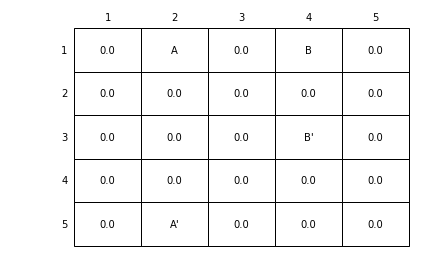

In [3]:
WORLD_SIZE=5
draw_image(np.zeros((WORLD_SIZE,WORLD_SIZE)))

Figure above shows a rectangular gridworld. The cell of the grid correspond to the state of the environment. At each cell, four actions with equal probability are possible: north, south, east and west, which deterministically cause the agent to move one cell in the respective direction on the grid. Actions that would take the agent off the grid leave its unchanged, but also result in a reward -1. Other actions result in a reward of 0, expect those taht move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actions yield a reward of +5 and take the agent to B'. 

#### Try to compute the value of each state ? You can choose any algorithms we leanred in the class.
Good luck and happy new year. !!

参考https://nbviewer.jupyter.org/github/kkb-Alex/kaikeba/blob/master/Assignment-16/Assignment_week_16.ipynb

In [4]:
table = np.zeros((WORLD_SIZE, WORLD_SIZE))

In [5]:
table

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

迭代公式：
            

In [6]:
def calc_v(i, j, v_table, gamma=0.9):
    if (i, j) == (0, 1):
        up_r = down_r = left_r = right_r = 10
        up_v = down_v = left_v = right_v = v_table[4][1]
    elif (i, j) == (0, 3):
        up_r = down_r = left_r = right_r = 5
        up_v = down_v = left_v = right_v = v_table[2][3]
    else:
        if j - 1 < 0:
            up_r, up_v = -1, v_table[i][j]
        else:
            up_r, up_v = 0, v_table[i][j-1]
        if j + 1 > 4:
            down_r, down_v = -1, v_table[i][j]
        else:
            down_r, down_v = 0, v_table[i][j+1]
        if i - 1 < 0:
            left_r, left_v = -1, v_table[i][j]
        else:
            left_r, left_v = 0, v_table[i-1][j]
        if i + 1 > 4:
            right_r, right_v = -1, v_table[i][j]
        else:
            right_r, right_v = 0, v_table[i+1][j]
    return 0.25*((up_r+gamma*up_v)+(down_r+gamma*down_v)+(left_r+gamma*left_v)+(right_r+gamma*right_v))

In [7]:
def iter_v(theta=1e-2):
    table = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        new_table = np.zeros((WORLD_SIZE, WORLD_SIZE))
        for (i,j), _ in np.ndenumerate(table):
            v = calc_v(i, j, table)
            new_table[i][j] = v
        if np.average(np.abs(table-new_table)) < theta:
            return new_table
        table = new_table

In [8]:
def draw_table(table):
    fig,ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax,bbox=[0,0,1,1])

    nrows,ncols = table.shape
    width,height = 1.0/ncols,1.0/nrows

    for (i,j), val in np.ndenumerate(table):
        tb.add_cell(i,j,width,height,text=val,
                    loc='center',facecolor='white')

    for i in range(len(table)):
        tb.add_cell(i,-1,width,height,text=i+1,loc='right',
                    edgecolor='none',facecolor='none')
        tb.add_cell(-1,i,width,height/2,text=i+1,loc='center',
                    edgecolor='none',facecolor='none')
    ax.add_table(tb)

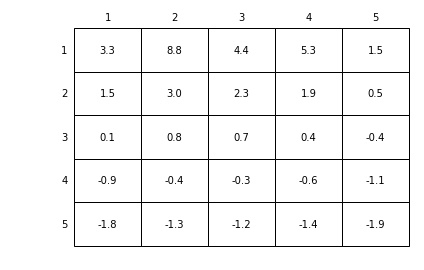

In [9]:
draw_table(np.around(iter_v(), decimals=1))